## Phase 4 (Modeling): Modell 6 (Sex, Age, Pclass)

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 22](https://data-science.training/kapitel-22/)
* Datum: 23.03.2023

Originaldaten

Modell 6: Frauen und Kinder der 1. und 2. Klasse überleben, alle anderen sterben.

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf

In [5]:
# Trainingsdaten als Pandas Data Frame (df) aus CSV-Datei laden
#  (KNIME: "CSV Reader")
filename = '../../data/titanic/original/train.csv'
df_train = pd.read_csv(filename)

In [6]:
# Informationen anzeigen
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Age (Kardinalskala): 263 fehlende Werte => Benutze den Mittelwert
age_mean  = df_train['Age'].dropna().mean()
df_train['Age'] = df_train['Age'].fillna(age_mean)

In [8]:
# Modell 6: Frauen und Kinder der 1. und 2. Klasse überleben, alle anderen sterben. 
#  (KNIME: "Category To Number" und "Math Formula")
df_train['Prediction'] = ( ( (df_train['Sex'] == 'female') | (df_train['Age'] < 12) ) \
                         & ( (df_train['Pclass'] != 3) ) ).astype('int')

In [9]:
# Data Frame anzeigen
display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


In [10]:
# Lösung (Survived) extrahieren
y_true = df_train.iloc[:,1].values
# Prognose (Prediction) extrahieren
y_pred = df_train.iloc[:,12].values

In [11]:
# Klassen-Wahrscheinlichkeiten bestimmen
n = len(y_pred)
y_prob = np.zeros((n,2))
for i in range(0, n):
    y_prob[i][0] = 1 - y_pred[i]
    y_prob[i][1] =     y_pred[i]

In [12]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Predictor", "Scorer")
scores = sf.dst_scores_predictions(y_true, y_prob, y_pred)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 540
* TP (True  Positives) : 173
* FN (False Negatives) : 169
* FP (False Positives) : 9

Gütemaße

* Genauigkeit  (Accuracy)    :   80,02 %
* Spezifität   (Specificity) :   98,36 %
* Sensitivität (Sensitivity) :   50,58 %
* Präzision    (Precision)   :   95,05 %
* Recall       (Recall)      :   50,58 %
* F-Maß        (F Score)     :   66,03 %
* AURC         (AURC)        :   74,47 %
* LogLoss      (LogLoss)     :    7,201

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  78,90 %


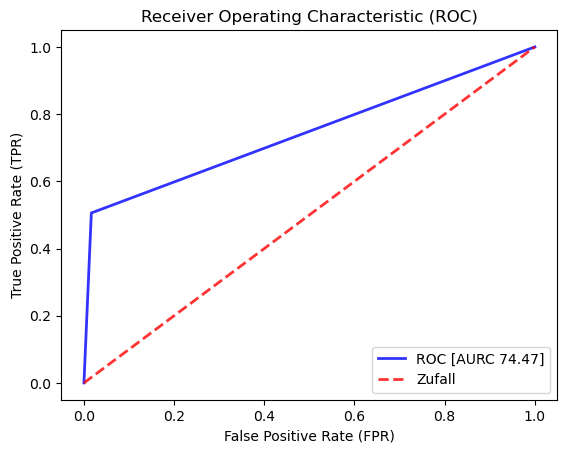

In [13]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc_predictions(y_true, y_pred)

## Ergebnisse

Confusion Matrix

* TN (True  Negatives) : 540
* TP (True  Positives) : 173
* FN (False Negatives) : 169
* FP (False Positives) : 9

Gütemaße

* Genauigkeit  (Accuracy)    :   80,02 %
* Spezifität   (Specificity) :   98,36 %
* Sensitivität (Sensitivity) :   50,58 %
* Präzision    (Precision)   :   95,05 %
* Recall       (Recall)      :   50,58 %
* F-Maß        (F Score)     :   66,03 %
* AURC         (AURC)        :   74,47 %
* LogLoss      (LogLoss)     :    7,201

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  78,90 %
